# **CIBA - PYTHON INTERMEDIO**

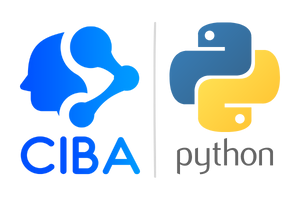


Contenido:

* Clasificación con Método de Árboles
* Árboles de Decisión
* Random Forest



# Ingresar al Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Clasificación con métodos de árboles

In [5]:
import random
random.seed(2020) #Número aleatorio

In [6]:
#Importación de Librerias y funciones 
import os
import pandas
import numpy

import seaborn
import matplotlib.pyplot as plt
import graphviz

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score,  f1_score, roc_auc_score

Red Wine Quality Dataset https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009?select=winequality-red.csv

In [8]:
path_base = "/content/drive/MyDrive/CLUBS DE APRENDIZAJE/CLUB PYTHON/PYTHON INTERMEDIO/Materiales Intermedio/"
os.listdir(path_base)

['german_credit_data.csv',
 'titanic_train.csv',
 'decision_tree_default.dot',
 'winequality-red.csv',
 'casas.txt',
 'Mall_Customers.csv']

In [9]:
df_wine = pandas.read_csv(f"{path_base}/winequality-red.csv")
df_wine.shape

(1599, 12)

In [10]:
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [13]:
df_wine["quality"].value_counts() #variable target

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [14]:
df_wine["quality_categorical"] = df_wine["quality"].apply(lambda value: 1 if value >= 7 else 0) #transformacion de valores
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [19]:
df_wine["quality_categorical"].value_counts() 

0    1382
1     217
Name: quality_categorical, dtype: int64

## Análisis descriptivo

In [16]:
df_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_categorical
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1.000000


In [17]:
df_wine["quality_categorical"].value_counts()

0    1382
1     217
Name: quality_categorical, dtype: int64

In [20]:
df_wine["quality_categorical"].value_counts() / len(df_wine) # En porcentaje

0    0.86429
1    0.13571
Name: quality_categorical, dtype: float64

In [ ]:
# _ = df_wine.hist(figsize= (10,10))

In [ ]:
# _ = df_wine.boxplot(figsize= (20,10))

In [ ]:
# columns_boxplot = [column for column in df_wine.columns if column not in ["free sulfur dioxide", "total sulfur dioxide"]]

# _ = df_wine[columns_boxplot].boxplot(figsize= (20,10))

In [21]:
feature_columns = [column for column in df_wine.columns if column not in ["quality", "quality_categorical"]]
feature_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [22]:
df_features = df_wine[feature_columns]
# target_continuous = df_wine["quality"]
target_categorical = df_wine["quality_categorical"]

In [23]:
df_features.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [24]:
df_features.shape, target_categorical.shape

((1599, 11), (1599,))

# Árboles de Decisión (Decision Tree)

Documentación https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

## Train test split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_features, target_categorical, test_size=0.20)

In [26]:
X_train.shape, X_test.shape

((1279, 11), (320, 11))

In [27]:
y_train.shape, y_test.shape

((1279,), (320,))

In [28]:
y_train.value_counts() / y_train.size

0    0.867084
1    0.132916
Name: quality_categorical, dtype: float64

In [30]:
y_test.value_counts() / y_test.size 

0    0.853125
1    0.146875
Name: quality_categorical, dtype: float64

## Fit con parámetros por defecto

In [34]:
tree_model = DecisionTreeClassifier()
tree_model

DecisionTreeClassifier()

In [35]:
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [36]:
prediction_train = tree_model.predict(X_train)
prediction_test = tree_model.predict(X_test)

In [37]:
prediction_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

In [39]:
tree_model.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [40]:
prediction_test_proba = tree_model.predict_proba(X_test)[:,1]
prediction_test_proba.shape

(320,)

In [41]:
accuracy_score(y_train, prediction_train)

1.0

In [51]:
accuracy_score(y_test, prediction_test)

0.846875

In [43]:
confusion_matrix(y_test, prediction_test)

array([[247,  26],
       [ 23,  24]])

In [44]:
cf_values = confusion_matrix(y_test, prediction_test)
pandas.DataFrame(cf_values, index = ["True Bad", "True Good"], columns = ["Predicted Bad", "Predicted Good"])

,Predicted Bad,Predicted Good
True Bad,247,26
True Good,23,24


In [45]:
precision_score(y_test, prediction_test)

0.48

In [46]:
recall_score(y_test, prediction_test)

0.5106382978723404

In [47]:
f1_score(y_test, prediction_test)

0.49484536082474223

In [48]:
roc_auc_score(y_test, prediction_test_proba)

0.7077001013171226

In [49]:
tree.export_graphviz(tree_model, out_file=f"{path_base}/decision_tree_default.dot", 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  

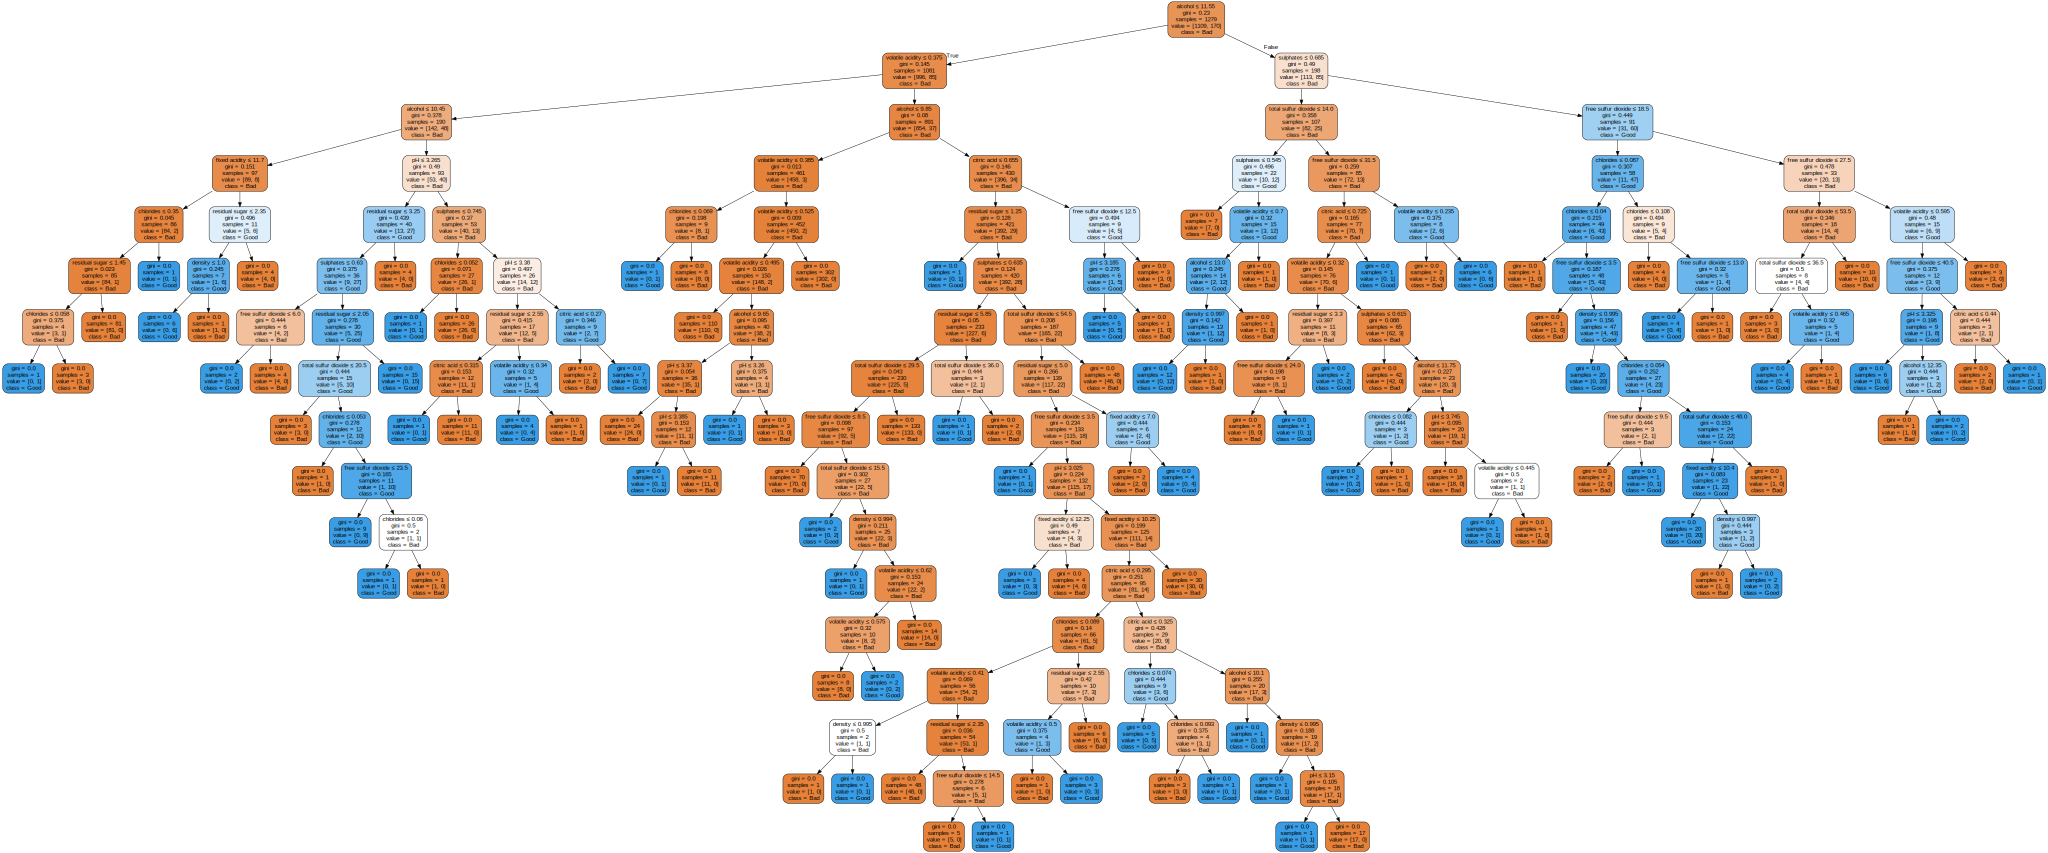

In [50]:
dot_data = tree.export_graphviz(tree_model, out_file=None, 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

## Grid Search

Permite elegir los mejores parametros para nuestro modelo.

In [55]:
tree_model_cv = DecisionTreeClassifier()
tree_model_cv

DecisionTreeClassifier()

In [56]:
parameters = {'criterion':['gini', 'entropy'], 
              'splitter': ['best', 'random'],
              'max_depth': range(3, 18, 3),
              'min_samples_split': [5, 10, 25, 50, 100, 200]}

clf = GridSearchCV(tree_model_cv, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 18, 3),
                         'min_samples_split': [5, 10, 25, 50, 100, 200],
                         'splitter': ['best', 'random']})

In [57]:
clf.best_params_ #mejores parametros

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_split': 50,
 'splitter': 'best'}

In [58]:
clf.best_score_

0.8850520833333334

In [59]:
best_tree = clf.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=12, min_samples_split=50)

In [60]:
resultados_cv = pandas.DataFrame(clf.cv_results_)
resultados_cv.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004139,0.000744,0.001631,0.000242,gini,3,5,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.863281,0.871094,0.894531,0.828125,0.886275,0.868661,0.023054,65
1,0.002188,0.000089,0.001373,0.000032,gini,3,5,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.859375,0.855469,0.867188,0.867188,0.874510,0.864746,0.006666,99
2,0.003727,0.000027,0.001403,0.000033,gini,3,10,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.863281,0.871094,0.894531,0.828125,0.886275,0.868661,0.023054,65
3,0.002342,0.000500,0.002041,0.000976,gini,3,10,random,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.902344,0.851562,0.855469,0.867188,0.866667,0.868646,0.017928,73
4,0.004355,0.000697,0.001719,0.000334,gini,3,25,best,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.863281,0.871094,0.894531,0.843750,0.886275,0.871786,0.017811,38


In [61]:
resultados_cv.sort_values(by = "mean_test_score", ascending = False).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
42,0.006309,0.000463,0.001724,0.000187,gini,12,50,best,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.878906,0.894531,0.910156,0.875000,0.866667,0.885052,0.015472,1
43,0.002702,0.000118,0.001559,0.000192,gini,12,50,random,"{'criterion': 'gini', 'max_depth': 12, 'min_sa...",0.882812,0.894531,0.878906,0.875000,0.890196,0.884289,0.007173,2
18,0.005182,0.000096,0.001478,0.000041,gini,6,50,best,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.878906,0.882812,0.910156,0.875000,0.870588,0.883493,0.013936,3
30,0.005989,0.000304,0.001601,0.000130,gini,9,50,best,"{'criterion': 'gini', 'max_depth': 9, 'min_sam...",0.882812,0.882812,0.910156,0.867188,0.866667,0.881927,0.015802,4
12,0.005865,0.000093,0.001761,0.000143,gini,6,5,best,"{'criterion': 'gini', 'max_depth': 6, 'min_sam...",0.855469,0.898438,0.886719,0.871094,0.894118,0.881167,0.015866,5


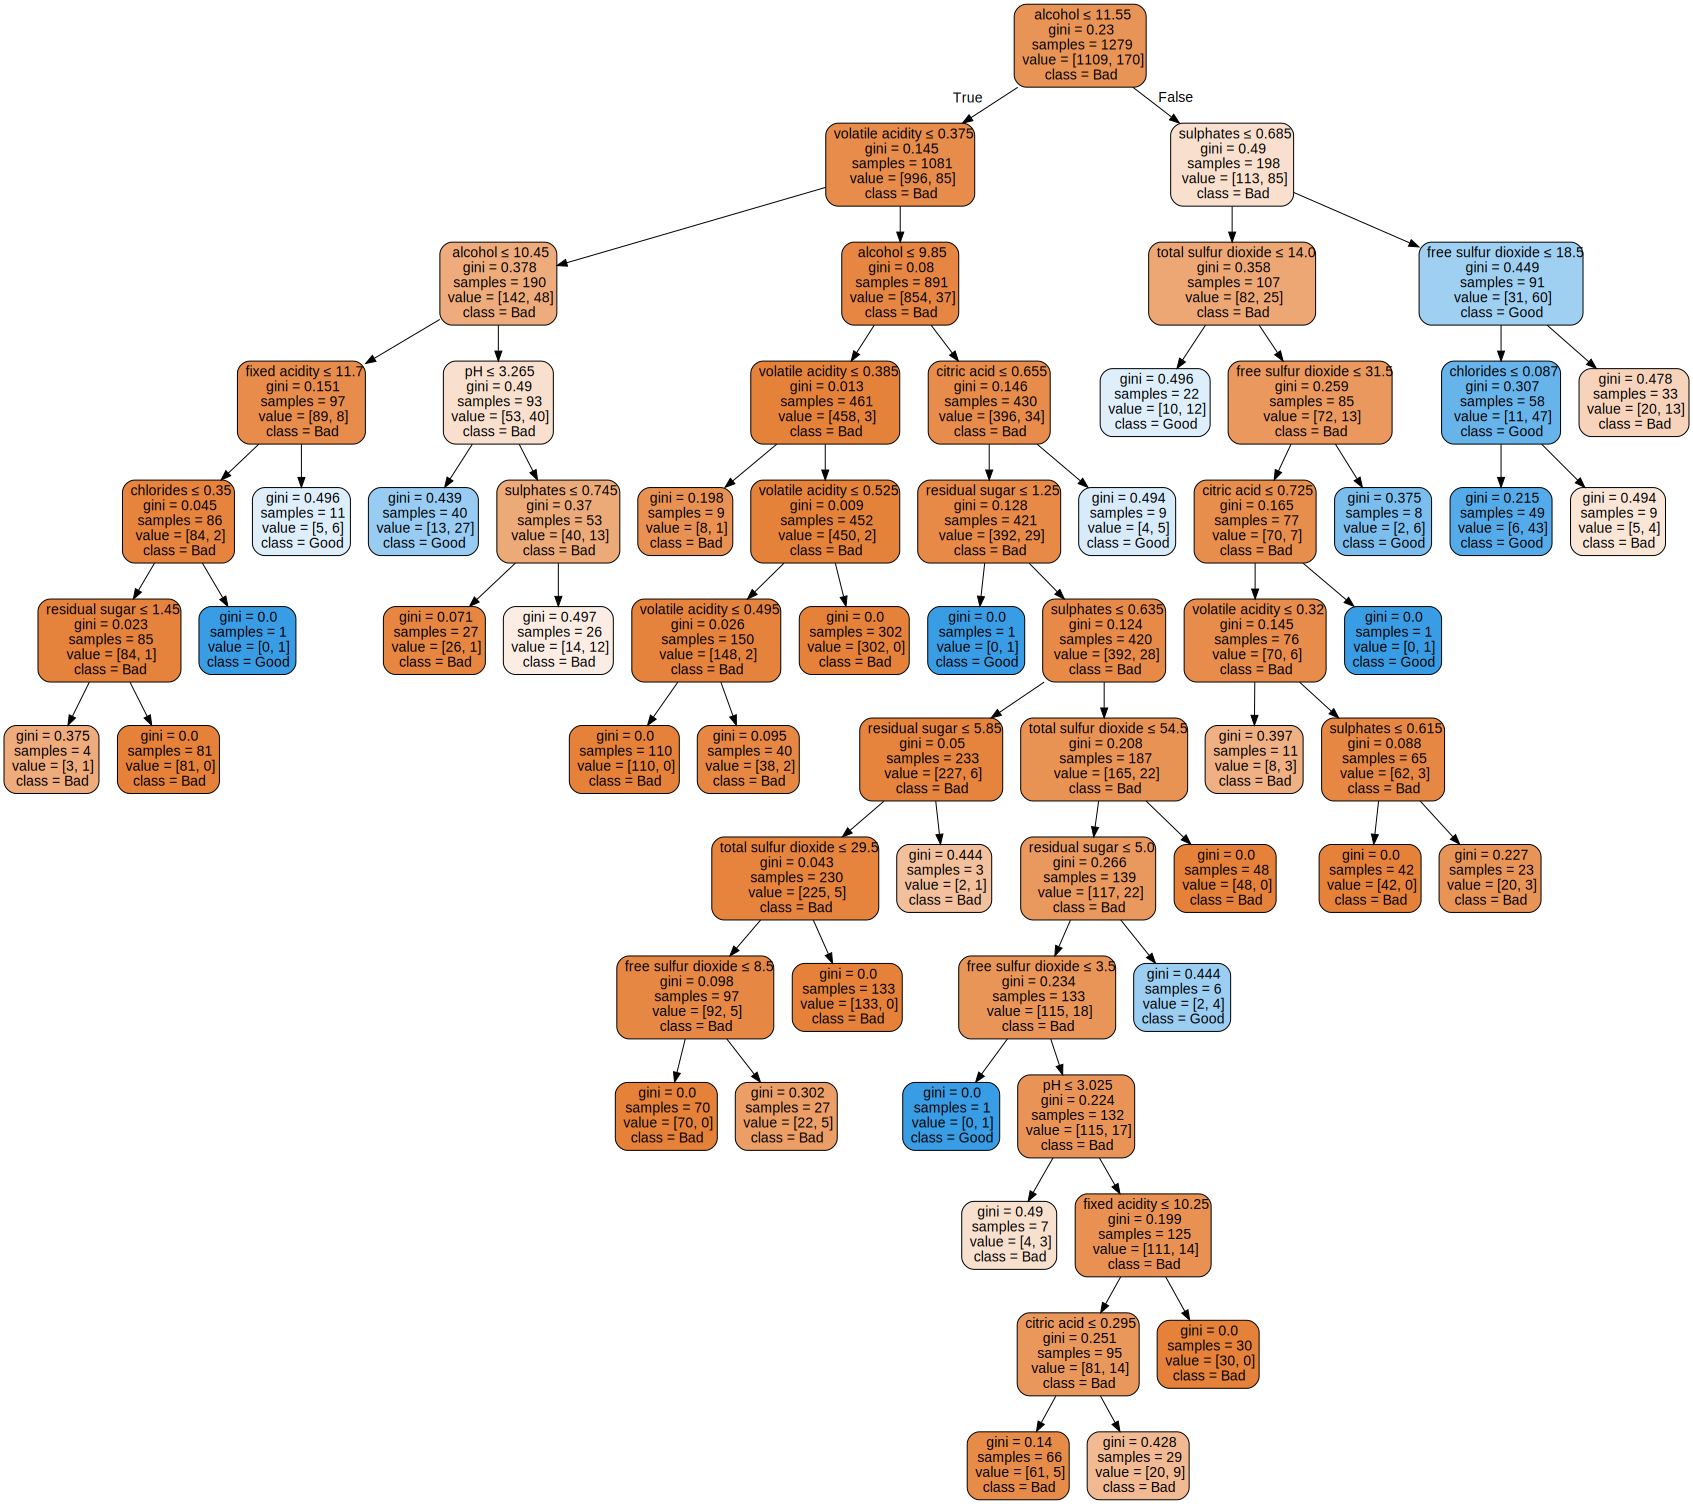

In [62]:
#El mejor arbol
dot_data = tree.export_graphviz(best_tree, out_file=None, 
                                 feature_names=df_features.columns,
                                 class_names=["Bad", "Good"],
                                 filled=True, rounded=True,  
                                 special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [63]:
accuracy_score(y_test, best_tree.predict(X_test))

0.84375

In [64]:
cf_values = confusion_matrix(y_test, best_tree.predict(X_test))
pandas.DataFrame(cf_values, index = ["True Bad", "True Good"], columns = ["Predicted Bad", "Predicted Good"])

,Predicted Bad,Predicted Good
True Bad,249,24
True Good,26,21


In [65]:
best_tree.predict_proba(X_test)

array([[1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.53846154, 0.46153846],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.55555556, 0.44444444],
       [0.96296296, 0.03703704],
       [0.12244898, 0.87755102],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.92424242, 0.07575758],
       [0.325     , 0.675     ],
       [1.        , 0.        ],
       [0.25      , 0.75      ],
       [1.        , 0.        ],
       [0.33333333, 0.66666667],
       [1.        , 0.        ],
       [0.325     , 0.675     ],
       [0.92424242, 0.07575758],
       [1.        , 0.        ],
       [0.88888889, 0.11111111],
       [0.44444444, 0.55555556],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.86956522, 0.13043478],
       [1.        , 0.        ],
       [0.

In [66]:
roc_auc_score(y_test, best_tree.predict_proba(X_test)[:,1])

0.8301379471592237

# Bosques Aleatorios (Random Forest)

In [67]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
prediction_test = random_forest.predict_proba(X_test)

In [69]:
roc_auc_score(y_test, prediction_test[:,1])

0.9194528875379939

In [70]:
clf = GridSearchCV(random_forest, param_grid = {'n_estimators' : range(10, 420, 20), 
                                                'n_jobs' : [-1],
                                                'min_samples_split': [5, 10, 25, 50, 100, 200]})
clf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': [5, 10, 25, 50, 100, 200],
                         'n_estimators': range(10, 420, 20), 'n_jobs': [-1]})

In [71]:
best_tree = clf.best_estimator_
prediction_test = best_tree.predict_proba(X_test)
roc_auc_score(y_test, prediction_test[:,1])

0.9062816616008105

In [72]:
best_tree.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 70,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# Referencias

[Documentación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)